# Lab 7

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
warnings.filterwarnings('ignore')

## Problem 1

### Part 1

In [289]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data")
with open("/content/drive/MyDrive/PRML/Lab7/anneal.names") as f:
  names = f.read()
print(names)

1. Title of Database: Annealing Data

2. Source Information: donated by David Sterling and Wray Buntine.

3. Past Usage: unknown

4. Relevant Information:
   -- Explanation: I suspect this was left by Ross Quinlan in 1987 at the
      4th Machine Learning Workshop.  I'd have to check with Jeff Schlimmer
      to double check this.

5. Number of Instances: 798

6. Number of Attributes: 38
   -- 6 continuously-valued
   -- 3 integer-valued
   -- 29 nominal-valued

7. Attribute Information:
    1. family:		--,GB,GK,GS,TN,ZA,ZF,ZH,ZM,ZS
    2. product-type:	C, H, G
    3. steel:		-,R,A,U,K,M,S,W,V
    4. carbon:		continuous
    5. hardness:	continuous
    6. temper_rolling:	-,T
    7. condition:	-,S,A,X
    8. formability:	-,1,2,3,4,5
    9. strength:	continuous
   10. non-ageing:	-,N
   11. surface-finish:	P,M,-
   12. surface-quality: -,D,E,F,G
   13. enamelability:	-,1,2,3,4,5
   14. bc:		Y,-
   15. bf:		Y,-
   16. bt:		Y,-
   17. bw/me:		B,M,-
   18. bl:		Y,-
   19. m:		Y,-
   20. chro

In [290]:
cols = ['family', 'product-type', 'steel', 'carbon', 'hardness', 'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class']
dataset_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data",names = cols)
dataset_train

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [291]:
dataset_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.test",names = cols)
dataset_test

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
96,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
97,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
98,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


In [292]:
dataset_train = dataset_train.replace(to_replace = "?",value = np.nan)
dataset_test = dataset_test.replace(to_replace = "?",value = np.nan)

In [293]:
dataset_train2 = dataset_train.copy()
null_perc = dataset_train2.isnull().sum() / len(dataset_train)
columns_to_drop = null_perc[null_perc > 0.25].index
dataset_train2 = dataset_train2.drop(columns_to_drop,axis = 1)
dataset_train2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,C,NaN,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [294]:
dataset_test2 = dataset_test.copy()
null_perc = dataset_test2.isnull().sum() / len(dataset_test)
columns_to_drop = null_perc[null_perc > 0.25].index
dataset_test2 = dataset_test2.drop(columns_to_drop,axis = 1)
dataset_test2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,A,0,45,0,COIL,1.600,610.0,0,0,3
1,C,A,0,0,0,COIL,0.699,609.9,0,0,3
2,C,A,0,85,0,SHEET,0.400,610.0,762,0,U
3,C,A,0,50,0,COIL,0.400,610.0,0,0,3
4,C,A,0,0,0,COIL,0.699,1320.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
95,C,R,0,0,0,SHEET,1.599,610.0,762,0,2
96,C,R,0,0,0,SHEET,1.601,830.0,880,0,2
97,C,V,0,0,0,SHEET,1.599,150.0,762,0,2
98,C,A,0,85,0,COIL,0.400,20.0,0,0,U


In [295]:
dataset_train2 = dataset_train2.dropna(axis = 0)
dataset_train2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,C,R,0,0,0,COIL,0.900,966.0,0,0,3
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [296]:
dataset_test2 = dataset_test2.dropna(axis = 0)
dataset_test2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,A,0,45,0,COIL,1.600,610.0,0,0,3
1,C,A,0,0,0,COIL,0.699,609.9,0,0,3
2,C,A,0,85,0,SHEET,0.400,610.0,762,0,U
3,C,A,0,50,0,COIL,0.400,610.0,0,0,3
4,C,A,0,0,0,COIL,0.699,1320.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
95,C,R,0,0,0,SHEET,1.599,610.0,762,0,2
96,C,R,0,0,0,SHEET,1.601,830.0,880,0,2
97,C,V,0,0,0,SHEET,1.599,150.0,762,0,2
98,C,A,0,85,0,COIL,0.400,20.0,0,0,U


In [297]:
for i in ["product-type","steel","shape"]:
  dataset_train2[i] = LabelEncoder().fit_transform(dataset_train2[i])
  dataset_test2[i] = LabelEncoder().fit_transform(dataset_test2[i])
dataset_train2

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,0,0,8,0,0,0,0.700,610.0,0,0,3
1,0,3,0,0,0,0,3.200,610.0,0,0,3
2,0,3,0,0,0,1,0.700,1300.0,762,0,3
3,0,0,0,60,0,0,2.801,385.1,0,0,3
4,0,0,0,60,0,1,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
792,0,3,0,0,0,0,0.900,966.0,0,0,3
793,0,0,0,50,0,0,1.001,50.0,0,0,3
795,0,0,0,0,0,0,0.400,609.9,0,0,3
796,0,0,0,0,0,1,3.200,610.0,4880,0,3


<Axes: >

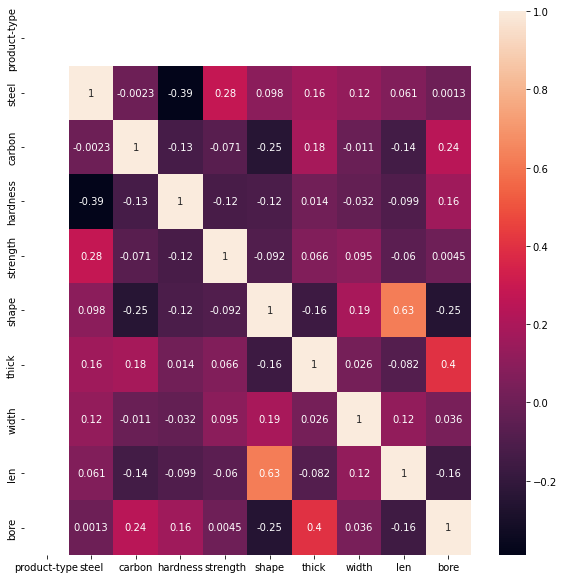

In [298]:
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(dataset_train2.corr(),annot = True)

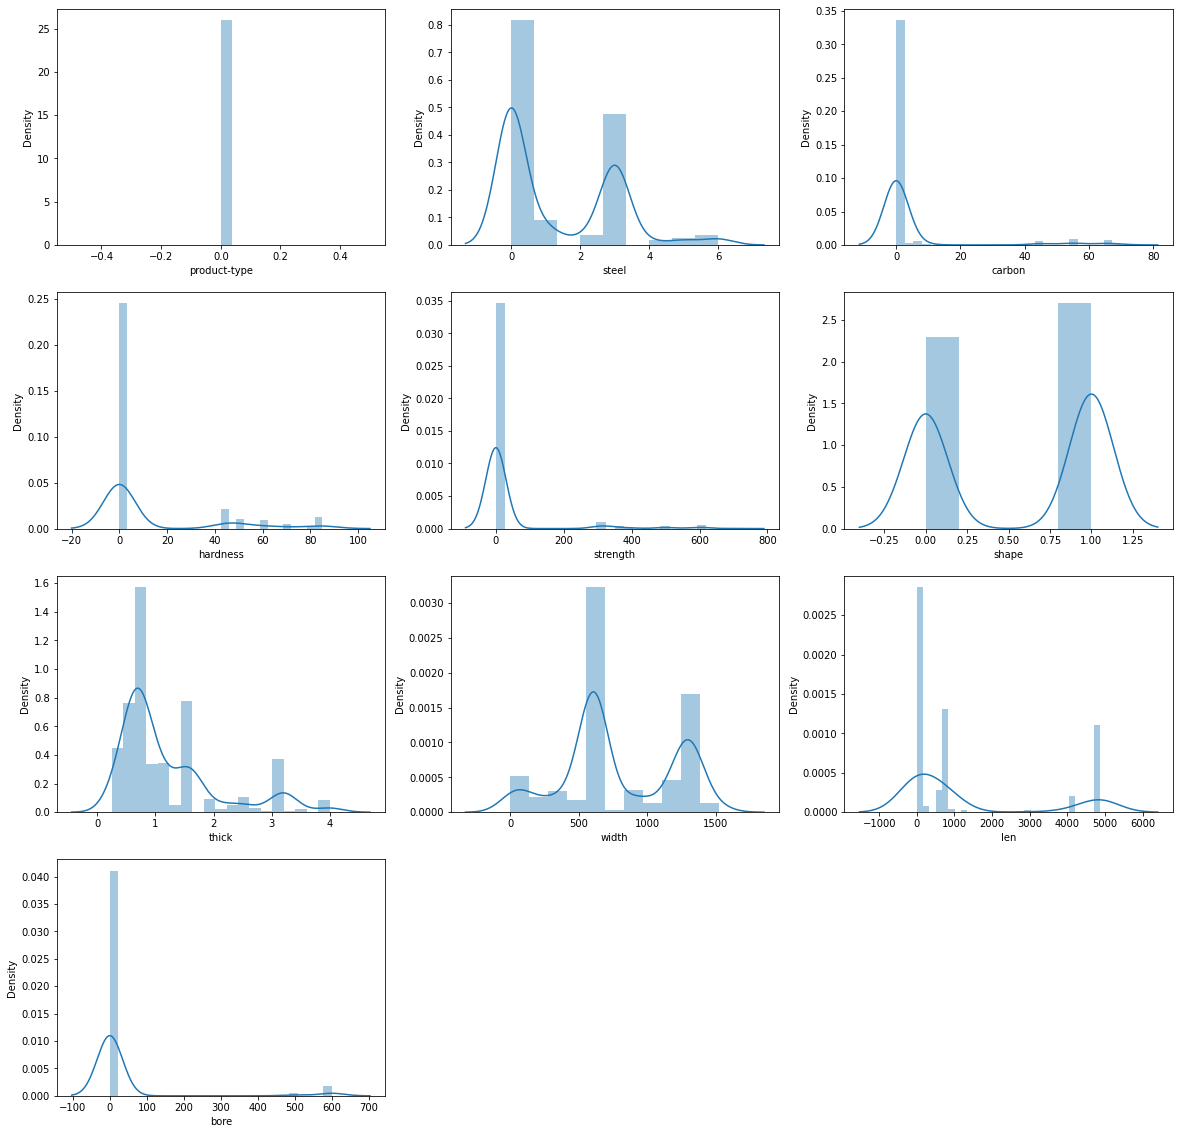

In [299]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure(figsize =(20, 20))
cnt = 0
for i in dataset_train2.columns[:-1]:
  cnt += 1
  ax = fig.add_subplot(4, 3, cnt)
  sns.distplot(dataset_train2[i],ax= ax)
plt.show()

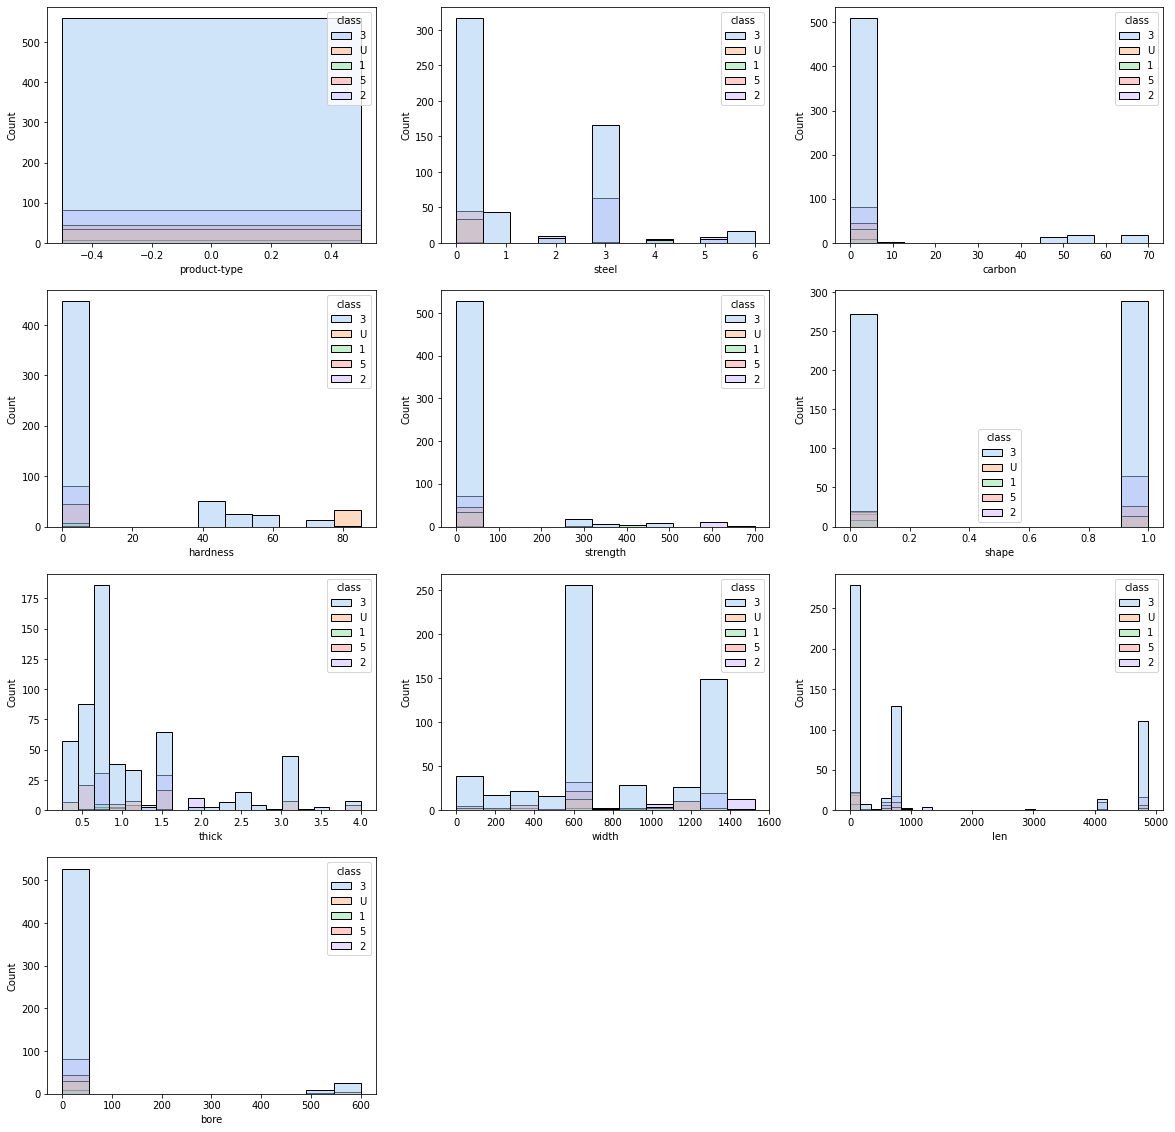

In [300]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure(figsize =(20, 20))
cnt = 0
my_palette = sns.color_palette("pastel",n_colors = len(dataset_train2[dataset_train2.columns[-1]].unique()))
for i in dataset_train2.columns[:-1]:
  cnt += 1
  ax = fig.add_subplot(4, 3, cnt)
  sns.histplot(data = dataset_train2,x = i,hue = dataset_train2[dataset_train2.columns[-1]],palette=my_palette,ax= ax)
plt.show()

### Part 2

In [301]:
Xtrain = dataset_train2.drop("class",axis = 1)
Ytrain = dataset_test2.drop("class",axis = 1)
Xtest = dataset_train2["class"]
Ytest = dataset_test2["class"]
Xtrain = StandardScaler().fit_transform(Xtrain)
Ytrain = StandardScaler().fit_transform(Ytrain)


X_train,X_test,Y_train,Y_test = tts(Xtrain,Xtest,test_size = 0.35 ,shuffle = True)
X_train_not,X_test_not,Y_train_not,Y_test_not = tts(dataset_train2.drop("class",axis = 1),dataset_train2["class"],test_size = 0.35 ,shuffle = True)
print(X_train.shape,X_train_not.shape)

(473, 10) (473, 10)


### Part 3

In [ ]:
score_val = []
score_val_not = []

In [ ]:
## SVM 
Kfold = KFold(5)
clf_svm = svm.SVC().fit(X_train,Y_train)
clf_svm_not = svm.SVC().fit(X_train_not,Y_train_not)

scores = cvs(clf_svm,Xtrain,Xtest,cv = Kfold)
scores_not = cvs(clf_svm_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print("Standardize",scores)
print("Not Standardize",scores_not)
score_val.append(scores)
score_val_not.append(scores_not)

Standardize [0.74657534 0.84931507 0.83561644 0.84137931 0.79310345]
Not Standardize [0.74657534 0.79452055 0.73972603 0.80689655 0.75862069]


In [ ]:
## Bagging Classifier
Kfold = KFold(5)
clf_bc = BC().fit(X_train,Y_train)
clf_bc_not = BC().fit(X_train_not,Y_train_not)

scores = cvs(clf_bc,Xtrain,Xtest,cv = Kfold)
scores_not = cvs(clf_bc_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print("Standardize",scores)
print("Not Standardize",scores_not)
score_val.append(scores)
score_val_not.append(scores_not)

Standardize [0.87671233 0.90410959 0.91780822 0.88275862 0.85517241]
Not Standardize [0.85616438 0.91780822 0.91780822 0.87586207 0.88965517]


In [ ]:
## Random Forest Classifier
Kfold = KFold(5)
clf_rfc = RFC().fit(X_train,Y_train)
clf_rfc_not = RFC().fit(X_train_not,Y_train_not)

scores = cvs(clf_rfc,Xtrain,Xtest,cv = Kfold)
scores_not = cvs(clf_rfc_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print("Standardize",scores)
print("Not Standardize",scores_not)
score_val.append(scores)
score_val_not.append(scores_not)

Standardize [0.88356164 0.94520548 0.91780822 0.90344828 0.87586207]
Not Standardize [0.88356164 0.93150685 0.93150685 0.88965517 0.89655172]


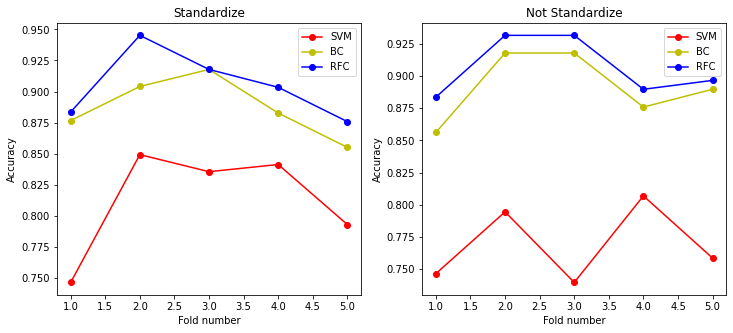

In [ ]:
c = ['r','y','b']
label = ['SVM','BC','RFC']
cnt = 0
fig = plt.figure(figsize =(12, 5))
lis = [score_val,score_val_not]
for j in range(len(lis)):
  cnt += 1
  k = 0
  ax = fig.add_subplot(1,2,cnt)
  for i in lis[j]:
    ax.plot(range(1,6),i,color = c[k],label = label[k], marker='o')
    k += 1
  plt.legend()
  if(j == 0):
    plt.title("Standardize")
  else:
    plt.title("Not Standardize")
  plt.xlabel("Fold number")
  plt.ylabel("Accuracy")
plt.show()


### Part 4

In [ ]:
Xtrain = pd.DataFrame(data = Xtrain,columns = dataset_train2.columns[:-1])
Ytrain = pd.DataFrame(data = Ytrain,columns = dataset_train2.columns[:-1])
Xtrain.shape

(728, 10)

In [303]:
## Centrailizing of the data is done using Standard Scaler in part 1 and preprocessing.
# cov(x, y) = (1/n) * ∑[(x_i - mean(x))(y_i - mean(y))]
def Centrailizing(dataset):
  cols = dataset.columns
  n = dataset.shape[0]
  for i in range(dataset.shape[1]):
    mean_ = np.mean(dataset[cols[i]])
    std_ = np.std(dataset[cols[i]])
    if(std_ != 0):
      for j in range(n):
        dataset[cols[i]][j] = ((dataset[cols[i]][j] - mean_)/(std_))
  return dataset

def covariance_mat(dataset):
  mat = np.zeros((dataset.shape[1],dataset.shape[1]))
  cols = dataset.columns
  n = dataset.shape[0]
  for i in range(dataset.shape[1]):
    mean_x = np.mean(dataset[cols[i]])
    for j in range(dataset.shape[1]):
      val = 0
      mean_y = np.mean(dataset[cols[j]])
      for k in range(n):
        val +=((dataset[cols[j]][k] - mean_y)*(dataset[cols[i]][k] - mean_x))
      cov_xy = (1/n) * (val)
      mat[i][j] = cov_xy
  mat = pd.DataFrame(data = mat,columns = cols,index = cols)
  return mat

In [ ]:
dataset_train2 = dataset_train2.set_index(np.arange(len(dataset_train2)))

In [ ]:
# X_scale = Centrailizing(pd.DataFrame(X_train_not))
# X_scale
# X_train_not
Y_train_not = Y_train_not.replace(to_replace='U' , value = 6)
X_scale =  pd.DataFrame(X_train_not,columns = dataset_train2.columns[:-1])
X_scale = X_scale.set_index(np.arange(len(X_scale)))
X_scale = Centrailizing(X_scale)
X_scale

<ipython-input-74-f0d544744a30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cols[i]][j] = ((dataset[cols[i]][j] - mean_)/(std_))


,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0,1.003946,-0.272531,-0.488993,-0.274684,0.920682,2.245465,1.265763,1.902022,-0.235545
1,0,-0.820125,-0.272531,2.889007,-0.274684,-1.086151,-0.033532,-0.487825,-0.679434,-0.235545
2,0,-0.820125,-0.272531,1.299360,-0.274684,0.920682,-0.604421,1.265763,1.902022,-0.235545
3,0,-0.820125,-0.272531,-0.488993,-0.274684,0.920682,0.422267,1.018813,-0.355694,-0.235545
4,0,1.003946,-0.272531,-0.488993,-0.274684,0.920682,-0.716092,-0.487578,1.902022,-0.235545
...,...,...,...,...,...,...,...,...,...,...
468,0,1.003946,-0.272531,-0.488993,-0.274684,0.920682,2.245465,-0.487578,1.902022,-0.235545
469,0,-0.820125,-0.272531,2.889007,-0.274684,-1.086151,3.157064,0.475525,-0.679434,4.406658
470,0,1.003946,-0.272531,-0.488993,-0.274684,-1.086151,-0.374242,0.391562,-0.679434,-0.235545
471,0,1.003946,-0.272531,-0.488993,-0.274684,0.920682,-0.033532,-1.623545,-0.355694,-0.235545


In [ ]:
cov_mat = covariance_mat(X_scale)
cov_mat

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
product-type,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
steel,0.0,1.000000,-0.031366,-0.401035,0.291860,0.099829,0.086651,0.142126,0.048444,-0.012166
carbon,0.0,-0.031366,1.000000,-0.133266,-0.074860,-0.263440,0.167091,-0.034695,-0.151276,0.227216
hardness,0.0,-0.401035,-0.133266,1.000000,-0.134319,-0.118861,0.060765,-0.009912,-0.073658,0.173771
strength,0.0,0.291860,-0.074860,-0.134319,1.000000,-0.094861,0.045730,0.069314,-0.053577,-0.017519
shape,0.0,0.099829,-0.263440,-0.118861,-0.094861,1.000000,-0.151422,0.188899,0.625543,-0.255838
thick,0.0,0.086651,0.167091,0.060765,0.045730,-0.151422,1.000000,0.017179,-0.084406,0.447698
width,0.0,0.142126,-0.034695,-0.009912,0.069314,0.188899,0.017179,1.000000,0.090661,-0.013417
len,0.0,0.048444,-0.151276,-0.073658,-0.053577,0.625543,-0.084406,0.090661,1.000000,-0.160037
bore,0.0,-0.012166,0.227216,0.173771,-0.017519,-0.255838,0.447698,-0.013417,-0.160037,1.000000


In [304]:
X_t =  pd.DataFrame(X_train_not,columns = dataset_train2.columns[:-1])
X_t = X_t.set_index(np.arange(len(X_t)))
cov_mat_not = covariance_mat(X_t)
cov_mat_not

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
product-type,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
steel,0.0,2.859969,-0.805899,-16.037259,59.982926,0.069405,0.232865,85.344072,2.568238e+02,10.914097
carbon,0.0,-0.805899,230.292229,-52.429502,-142.851396,-2.267650,2.597898,-176.790990,-4.460298e+03,568.531572
hardness,0.0,-16.037259,-52.429502,597.844714,-371.077509,-0.315516,-0.396042,-436.741681,-2.150888e+03,338.150173
strength,0.0,59.982926,-142.851396,-371.077509,13376.686080,-5.247018,7.361335,3740.093752,-8.659096e+03,393.163157
shape,0.0,0.069405,-2.267650,-0.315516,-5.247018,0.248122,-0.079537,36.263690,5.393700e+02,-17.919894
thick,0.0,0.232865,2.597898,-0.396042,7.361335,-0.079537,0.728863,-1.266221,-1.666573e+02,48.202677
width,0.0,85.344072,-176.790990,-436.741681,3740.093752,36.263690,-1.266221,158974.740471,4.319512e+04,1391.292814
len,0.0,256.823827,-4460.298263,-2150.888374,-8659.096049,539.370041,-166.657303,43195.123312,3.269082e+06,-38954.502992
bore,0.0,10.914097,568.531572,338.150173,393.163157,-17.919894,48.202677,1391.292814,-3.895450e+04,18066.589490


In [ ]:
def eigen_val_vec(covariance_mat):
  req_mat = np.zeros(covariance_mat.shape)
  try:
    req_mat = np.array(covariance_mat)
  except:
    req_mat = covariance_mat
  
  eig_val,eig_vec = np.linalg.eig(req_mat)

  eig_pairs = []
  for i in range(len(eig_val)):
    eig_pairs.append((eig_val[i],eig_vec[:,i]))
  eig_pairs.sort(reverse=True)

  return eig_pairs



In [288]:
from pandas._libs.lib import array_equivalent_object
class PCA:
  def __init__(self,dataset,n_components,standardize = True):
    self.dataset = dataset
    self.n_components = n_components
    self.standardize = standardize


  def _Centrailizing(self):
    cols = self.dataset.columns
    n = self.dataset.shape[0]
    for i in range(self.dataset.shape[1]):
      mean_ = np.mean(self.dataset[cols[i]])
      std_ = np.std(self.dataset[cols[i]])
      if(std_ != 0):
        for j in range(n):
          self.dataset[cols[i]][j] = ((self.dataset[cols[i]][j] - mean_)/(std_))

  def _covariance_mat(self):
    self.mat = np.zeros((self.dataset.shape[1],self.dataset.shape[1]))
    cols = self.dataset.columns
    n = self.dataset.shape[0]
    for i in range(self.dataset.shape[1]):
      mean_x = np.mean(self.dataset[cols[i]])
      for j in range(self.dataset.shape[1]):
        val = 0
        mean_y = np.mean(self.dataset[cols[j]])
        for k in range(n):
          val +=((self.dataset[cols[j]][k] - mean_y)*(self.dataset[cols[i]][k] - mean_x))
        cov_xy = (1/n) * (val)
        self.mat[i][j] = cov_xy

  def _eigen_val_vec(self):
    self.req_mat = np.zeros(self.mat.shape)
    try:
      self.req_mat = np.array(self.mat)
    except:
      self.req_mat = self.mat
    
    self.eig_val,self.eig_vec = np.linalg.eig(self.req_mat)

    self.eig_pairs = []
    for i in range(len(self.eig_val)):
      self.eig_pairs.append((self.eig_val[i],self.eig_vec[:,i]))
    self.eig_pairs.sort(reverse=True)
    # print(self.eig_pairs)

  def fit(self):
    if(self.standardize):
      self._Centrailizing()
    self._covariance_mat()
    self._eigen_val_vec()
    self.top_eigen_vec = []
    for i in range(self.n_components):
      self.top_eigen_vec.append(self.eig_pairs[i][1])
    # print(self.top_eigen_vec)
    dataset = np.array(self.dataset)
    self.top_eigen_vec = np.array(self.top_eigen_vec)
    # print(self.top_eigen_vec.transpose().shape,dataset.shape)
    self.final_dataset = np.dot(self.top_eigen_vec,dataset.transpose()).transpose()
    arr = []
    for i in range(len(self.eig_val)):
      arr.append(self.eig_pairs[i][0])
    arr = np.array(arr)
    explained_variance = arr/ np.sum(arr)
    ratio = explained_variance[:self.n_components]
    return self.final_dataset,ratio,self.top_eigen_vec

### Part 5

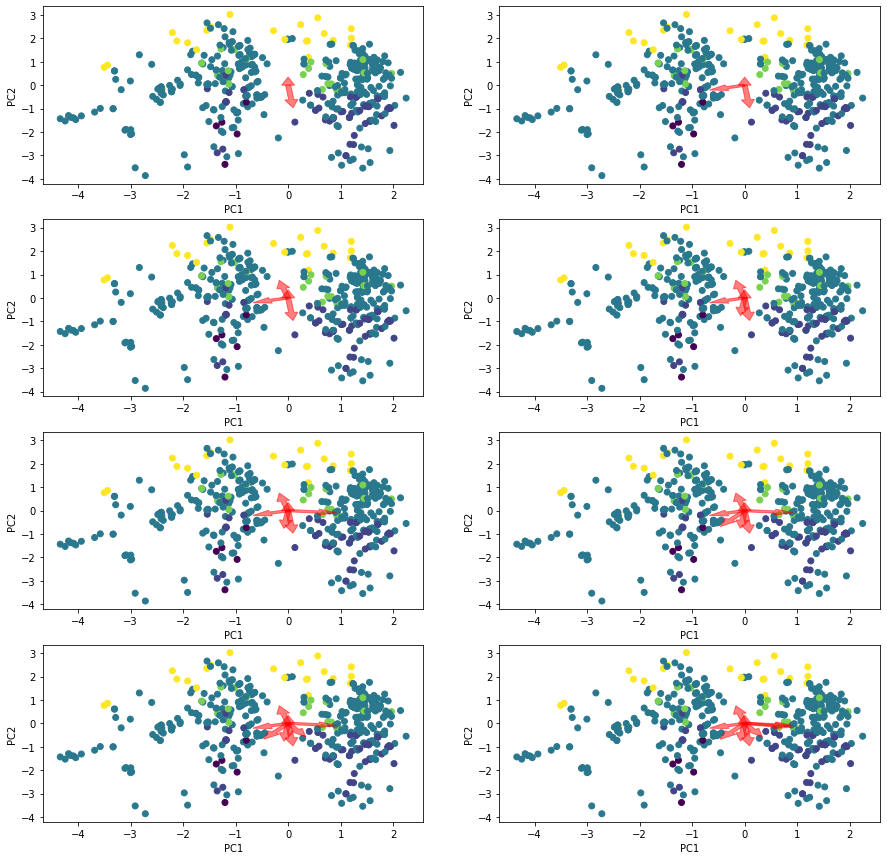

In [308]:
Y_train_not = Y_train_not.replace('U',6)
plt.rcParams["figure.figsize"] = (5,5)
fig = plt.figure(figsize =(15, 15))
arr = []
for i in range(2,len(X_t.columns)):
  X_pca,ratio,vec = PCA(X_t,i).fit()
  arr.append(ratio[i-1])
  ax = fig.add_subplot(4,2,i-1)
  plt.scatter(X_pca[:,0],X_pca[:,1],c = Y_train_not.astype(int))
  for j in range(len(vec)):
    plt.arrow(0,0,vec[0,j],vec[1,j],alpha=0.5, width=0.1, head_width=0.25, head_length=0.35,color='r')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
plt.show()

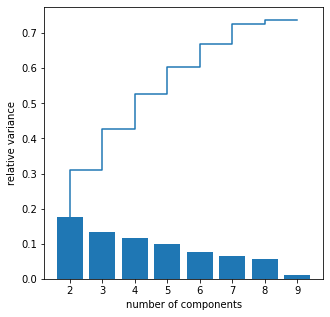

In [309]:
# plt.step(range(2,len(X_t.columns)),arr)
arr2 = np.cumsum(arr)
plt.bar(range(2,len(X_t.columns)),arr)
plt.step(range(2,len(X_t.columns)),arr2)
plt.xlabel('number of components')
plt.ylabel('relative variance') 
plt.show()

### Part 6

In [ ]:
X_reduced,rat,vec = PCA(dataset_train2.drop("class",axis = 1),2).fit()
X_reduced_train,X_reduced_test,Y_reduced_train,Y_reduced_test = tts(X_reduced,dataset_train2["class"],test_size = 0.35,shuffle = True)



<ipython-input-238-d97c98c6a529>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataset[cols[i]][j] = ((self.dataset[cols[i]][j] - mean_)/(std_))


In [ ]:
score_val = []
score_val_not = []

In [ ]:
## SVM 
Kfold = KFold(5)
clf_svm = svm.SVC().fit(X_reduced_train,Y_reduced_train)
# clf_svm_not = svm.SVC().fit(X_train_not,Y_train_not)

scores = cvs(clf_svm,X_reduced,dataset_train2["class"],cv = Kfold)
# scores_not = cvs(clf_svm_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print(scores)
# print("Not Standardize",scores_not)
score_val.append(scores)
# score_val_not.append(scores_not)

[0.74657534 0.79452055 0.73972603 0.80689655 0.75862069]


In [ ]:
## Bagging Classifier
Kfold = KFold(5)
clf_bc = BC().fit(X_reduced_train,Y_reduced_train)
# clf_bc_not = BC().fit(X_train_not,Y_train_not)

scores = cvs(clf_bc,X_reduced,dataset_train2["class"],cv = Kfold)
# scores_not = cvs(clf_bc_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print(scores)
# print("Not Standardize",scores_not)
score_val.append(scores)
# score_val_not.append(scores_not)

[0.81506849 0.90410959 0.82876712 0.80689655 0.82068966]


In [ ]:
## Random Forest Classifier
Kfold = KFold(5)
clf_rfc = RFC().fit(X_reduced_train,Y_reduced_train)
# clf_rfc_not = RFC().fit(X_train_not,Y_train_not)

scores = cvs(clf_rfc,X_reduced,dataset_train2["class"],cv = Kfold)
# scores_not = cvs(clf_rfc_not,dataset_train2.drop("class",axis =1),Xtest,cv = Kfold)
print(scores)
# print("Not Standardize",scores_not)
score_val.append(scores)
# score_val_not.append(scores_not)

[0.82876712 0.89726027 0.84931507 0.8        0.84827586]


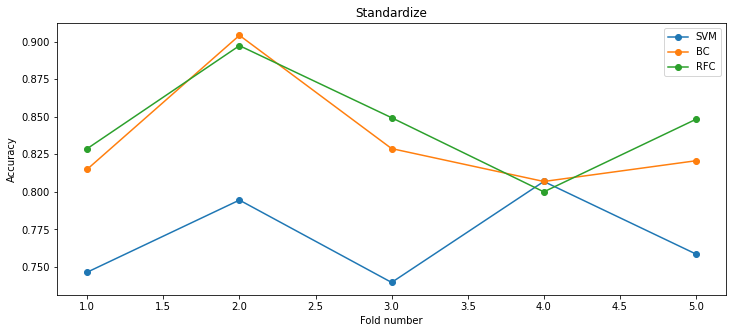

In [ ]:
c = ['r','y','b']
label = ['SVM','BC','RFC']
cnt = 0
fig = plt.figure(figsize =(12, 5))
# lis = [score_val,score_val_not]
# for j in range(len(score_val)):
#   cnt += 1
#   ax = fig.add_subplot(1,2,cnt)
# print(score_val)
for i in range(len(label)):
  plt.plot(range(1,6),score_val[i],label = label[i], marker='o')
# if(j == 0):
plt.title("Standardize")
# else:
  # plt.title("Not Standardize")
plt.legend()
plt.xlabel("Fold number")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
clf_svm_red = svm.SVC()
clf_svm_red.fit(X_reduced_train,Y_reduced_train)
y_svm_pred_red = clf_svm_red.predict(X_reduced_test)
print("Reduced --> accuracy_score",accuracy_score(Y_reduced_test,y_svm_pred_red))
print("Reduced --> f1-score",f1_score(Y_reduced_test,y_svm_pred_red,average= 'weighted'))
# print(confusion_matrix(Y_reduced_test,y_svm_pred_red))
print()
clf_svm = svm.SVC()
clf_svm.fit(X_train,Y_train)
y_svm_pred = clf_svm.predict(X_test)
print("UnReduced --> accuracy_score",accuracy_score(Y_test,y_svm_pred))
print("UnReduced --> f1-score",f1_score(Y_test,y_svm_pred,average='weighted'))
# print(confusion_matrix(Y_reduced_test,y_svm_pred))


Reduced --> accuracy_score 0.7803921568627451
Reduced --> f1-score 0.6841323313466355

UnReduced --> accuracy_score 0.8117647058823529
UnReduced --> f1-score 0.7463473336186737


In [ ]:
clf_BC_red = BC()
clf_BC_red.fit(X_reduced_train,Y_reduced_train)
y_BC_pred_red = clf_BC_red.predict(X_reduced_test)
print("Reduced --> accuracy_score",accuracy_score(Y_reduced_test,y_BC_pred_red))
print("Reduced --> f1_score",f1_score(Y_reduced_test,y_BC_pred_red,average = 'weighted'))
print()
clf_BC = BC()
clf_BC.fit(X_train,Y_train)
y_BC_pred = clf_BC.predict(X_test)
print("UnReduced --> accuracy_score",accuracy_score(Y_test,y_BC_pred))
print("UnReduced --> f1_score",f1_score(Y_test,y_BC_pred,average = 'weighted'))

Reduced --> accuracy_score 0.8352941176470589
Reduced --> f1_score 0.8151792498541726

UnReduced --> accuracy_score 0.8705882352941177
UnReduced --> f1_score 0.8546682899739416


In [ ]:
clf_RFC_red = RFC()
clf_RFC_red.fit(X_reduced_train,Y_reduced_train)
y_RFC_pred_red = clf_RFC_red.predict(X_reduced_test)
print("Reduced --> accuracy_score",accuracy_score(Y_reduced_test,y_RFC_pred_red))
print("Reduced --> f1-score",f1_score(Y_reduced_test,y_RFC_pred_red,average = 'weighted'))
print()
clf_RFC = RFC()
clf_RFC.fit(X_train,Y_train)
y_RFC_pred = clf_RFC.predict(X_test)
print("UnReduced --> accuracy_score",accuracy_score(Y_test,y_RFC_pred))
print("UnReduced --> f1-score",f1_score(Y_test,y_RFC_pred,average = 'weighted'))

Reduced --> accuracy_score 0.8470588235294118
Reduced --> f1-score 0.8344097895568482

UnReduced --> accuracy_score 0.8901960784313725
UnReduced --> f1-score 0.8806928726128469


### Part 7

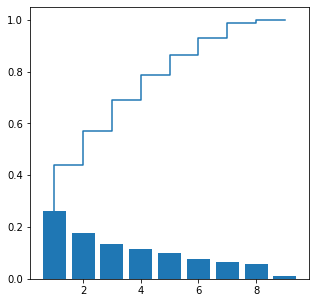

In [311]:
plt.rcParams["figure.figsize"] = (5,5)
# fig = plt.figure(figsize =(15, 15))
arr1 = []
arr2 = []
for i in range(1,len(X_t.columns)):
  X_pca,ratio,vec = PCA(X_t,i).fit()
  arr1.append(ratio[i-1])
  arr2.append(np.sum(ratio))
  # ax = fig.add_subplot(4,2,i-1)
  # plt.scatter(X_pca[:,0],X_pca[:,1],c = Y_train_not.astype(int))
  # for j in range(len(vec)):
  #   plt.arrow(0,0,vec[0,j],vec[1,j],alpha=0.5, width=0.1, head_width=0.25, head_length=0.35,color='r')
  # plt.xlabel('PC1')
  # plt.ylabel('PC2')
arr3 =np.cumsum(arr1)
plt.bar(range(1,len(X_t.columns)),arr1)
plt.step(range(1,len(X_t.columns)),arr3)
plt.show()

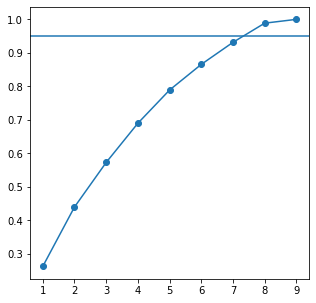

In [312]:
# plt.bar(range(1,len(X_t.columns)),arr1)
plt.plot(range(1,len(X_t.columns)),arr3,marker = 'o')
plt.axhline(0.95)
plt.show()

### Bonus

In [15]:
class PCA_new:
  def __init__(self,dataset,n_components,standardize = True,g =True):
    self.dataset = dataset
    self.n_components = n_components
    self.standardize = standardize
    self.g =g

  def _Centrailizing(self):
    cols = self.dataset.columns
    n = self.dataset.shape[0]
    for i in range(self.dataset.shape[1]):
      mean_ = np.mean(self.dataset[cols[i]])
      std_ = np.std(self.dataset[cols[i]])
      if(std_ != 0):
        for j in range(n):
          self.dataset[cols[i]][j] = ((self.dataset[cols[i]][j] - mean_)/(std_))

  def _covariance_mat(self):
    self.mat = np.zeros((self.dataset.shape[1],self.dataset.shape[1]))
    cols = self.dataset.columns
    n = self.dataset.shape[0]
    for i in range(self.dataset.shape[1]):
      mean_x = np.mean(self.dataset[cols[i]])
      for j in range(self.dataset.shape[1]):
        val = 0
        mean_y = np.mean(self.dataset[cols[j]])
        for k in range(n):
          val +=((self.dataset[cols[j]][k] - mean_y)*(self.dataset[cols[i]][k] - mean_x))
        cov_xy = (1/n) * (val)
        self.mat[i][j] = cov_xy
    if(self.g):
      for i in range(self.dataset.shape[1]):
        for j in range(self.dataset.shape[1]):
          if(i != j):
            self.mat[i][j] = 0


  def _eigen_val_vec(self):
    self.req_mat = np.zeros(self.mat.shape)
    try:
      self.req_mat = np.array(self.mat)
    except:
      self.req_mat = self.mat
    
    self.eig_val,self.eig_vec = np.linalg.eig(self.req_mat)
    ind = np.argsort(self.eig_val)[::-1]
    self.eig_val = self.eig_val[ind]
    self.eig_vec = self.eig_vec[ind]
    self.eig_pairs = []
    for i in range(len(self.eig_val)):
      self.eig_pairs.append((self.eig_val[i],self.eig_vec[:,i]))
    # print(self.eig_pairs)
    # self.eig_pairs.sort()[::-1]
    # print(self.eig_pairs)

  def fit(self):
    if(self.standardize):
      self._Centrailizing()
    self._covariance_mat()
    self._eigen_val_vec()
    self.top_eigen_vec = []
    for i in range(self.n_components):
      self.top_eigen_vec.append(self.eig_pairs[i][1])
    # print(self.top_eigen_vec)
    dataset = np.array(self.dataset)
    self.top_eigen_vec = np.array(self.top_eigen_vec)
    # print(self.top_eigen_vec.transpose().shape,dataset.shape)
    self.final_dataset = np.dot(self.top_eigen_vec,dataset.transpose()).transpose()
    arr = []
    for i in range(len(self.eig_val)):
      arr.append(self.eig_pairs[i][0])
    arr = np.array(arr)
    explained_variance = arr/ np.sum(arr)
    ratio = explained_variance[:self.n_components]
    return self.final_dataset,ratio,self.top_eigen_vec

In [16]:
dataset_train3 = dataset_test2.drop("class",axis = 1)
# for i in dataset_train3["steel"]:
#   print(i)
dataset_train3

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore
0,0,0,0,45,0,0,1.600,610.0,0,0
1,0,0,0,0,0,0,0.699,609.9,0,0
2,0,0,0,85,0,1,0.400,610.0,762,0
3,0,0,0,50,0,0,0.400,610.0,0,0
4,0,0,0,0,0,0,0.699,1320.0,0,0
...,...,...,...,...,...,...,...,...,...,...
95,0,3,0,0,0,1,1.599,610.0,762,0
96,0,3,0,0,0,1,1.601,830.0,880,0
97,0,5,0,0,0,1,1.599,150.0,762,0
98,0,0,0,85,0,0,0.400,20.0,0,0


Number of componets 1 Accuracy obtained => 0.7058823529411765
Number of componets 2 Accuracy obtained => 0.8235294117647058
Number of componets 3 Accuracy obtained => 0.6470588235294118
Number of componets 4 Accuracy obtained => 0.8235294117647058
Number of componets 5 Accuracy obtained => 0.8235294117647058
Number of componets 6 Accuracy obtained => 0.7058823529411765
Number of componets 7 Accuracy obtained => 0.6470588235294118
Number of componets 8 Accuracy obtained => 0.8235294117647058
Number of componets 9 Accuracy obtained => 0.6470588235294118
Number of componets 10 Accuracy obtained => 0.7058823529411765


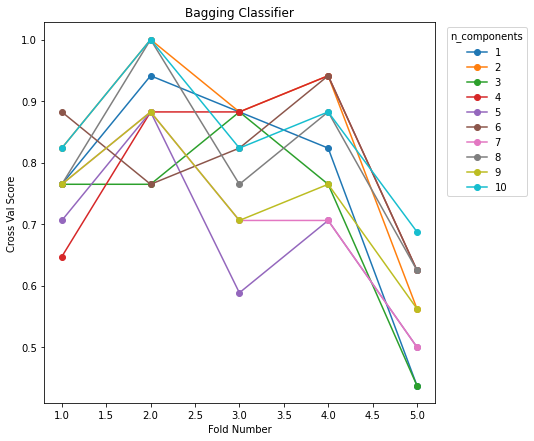

In [34]:

# X_tr = pd.dataFrame(X_tr)
plt.rcParams["figure.figsize"] = (7,7)
arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Kfold = KFold(5)

# print("Bagging Classifier is used to predict")
dataset_train3 = dataset_train3.set_index(np.arange(len(dataset_train3)))
for i in range(1,11):
  model = PCA_new(dataset= dataset_train3,n_components = i,g = True)
  data_red,t,r = model.fit()
  print("Number of componets",model.n_components,end = " ")
  X_tr,X_te,Y_tr,Y_te = tts(data_red,dataset_test2["class"],test_size =0.2,shuffle=True)
  model_BC = BC()
  model_BC.fit(X_tr,Y_tr)
  print("Accuracy obtained =>",model_BC.score(X_te,Y_te))
  score = cvs(model_BC,data_red,dataset_test2["class"],cv = Kfold)
  plt.plot(range(1,6),score,c = arr[i-1],label = i,marker = 'o')
plt.xlabel("Fold Number")
plt.ylabel("Cross Val Score")
plt.title("Bagging Classifier")
plt.legend(title = "n_components",bbox_to_anchor =(1.25, 1))
plt.show()


Number of componets 1 Accuracy obtained => 0.8235294117647058
Number of componets 2 Accuracy obtained => 0.8235294117647058
Number of componets 3 Accuracy obtained => 0.6470588235294118
Number of componets 4 Accuracy obtained => 0.9411764705882353
Number of componets 5 Accuracy obtained => 0.8235294117647058
Number of componets 6 Accuracy obtained => 0.7647058823529411
Number of componets 7 Accuracy obtained => 0.7058823529411765
Number of componets 8 Accuracy obtained => 0.7647058823529411
Number of componets 9 Accuracy obtained => 0.7647058823529411
Number of componets 10 Accuracy obtained => 0.7647058823529411


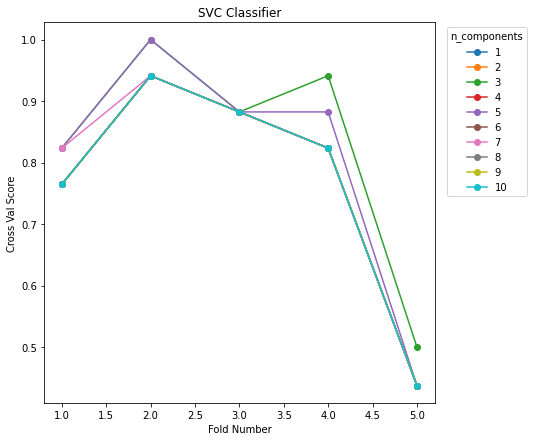

In [38]:

# X_tr = pd.dataFrame(X_tr)
plt.rcParams["figure.figsize"] = (7,7)
arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Kfold = KFold(5)

# print("Bagging Classifier is used to predict")
dataset_train3 = dataset_train3.set_index(np.arange(len(dataset_train3)))
for i in range(1,11):
  model = PCA_new(dataset= dataset_train3,n_components = i,g = True)
  data_red,t,r = model.fit()
  print("Number of componets",model.n_components,end = " ")
  X_tr,X_te,Y_tr,Y_te = tts(data_red,dataset_test2["class"],test_size =0.2,shuffle=True)
  model_svc = svm.SVC()
  model_svc.fit(X_tr,Y_tr)
  print("Accuracy obtained =>",model_svc.score(X_te,Y_te))
  score = cvs(model_svc,data_red,dataset_test2["class"],cv = Kfold)
  plt.plot(range(1,6),score,c = arr[i-1],label = i,marker = 'o')
plt.xlabel("Fold Number")
plt.ylabel("Cross Val Score")
plt.title("SVC Classifier")
plt.legend(title = "n_components",bbox_to_anchor =(1.25, 1))
plt.show()


Number of componets 1 Accuracy obtained => 0.5882352941176471
Number of componets 2 Accuracy obtained => 0.8823529411764706
Number of componets 3 Accuracy obtained => 0.9411764705882353
Number of componets 4 Accuracy obtained => 0.5882352941176471
Number of componets 5 Accuracy obtained => 0.8235294117647058
Number of componets 6 Accuracy obtained => 0.7647058823529411
Number of componets 7 Accuracy obtained => 0.8235294117647058
Number of componets 8 Accuracy obtained => 0.6470588235294118
Number of componets 9 Accuracy obtained => 0.8235294117647058
Number of componets 10 Accuracy obtained => 0.7647058823529411


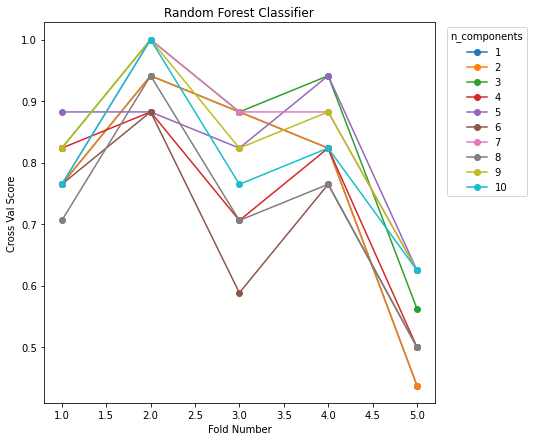

In [39]:
plt.rcParams["figure.figsize"] = (7,7)
arr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
Kfold = KFold(5)

# print("Bagging Classifier is used to predict")
dataset_train3 = dataset_train3.set_index(np.arange(len(dataset_train3)))
for i in range(1,11):
  model = PCA_new(dataset= dataset_train3,n_components = i,g = True)
  data_red,t,r = model.fit()
  print("Number of componets",model.n_components,end = " ")
  X_tr,X_te,Y_tr,Y_te = tts(data_red,dataset_test2["class"],test_size =0.2,shuffle=True)
  model_rfc = RFC()
  model_rfc.fit(X_tr,Y_tr)
  print("Accuracy obtained =>",model_rfc.score(X_te,Y_te))
  score = cvs(model_rfc,data_red,dataset_test2["class"],cv = Kfold)
  plt.plot(range(1,6),score,c = arr[i-1],label = i,marker = 'o')
plt.xlabel("Fold Number")
plt.ylabel("Cross Val Score")
plt.title("Random Forest Classifier")
plt.legend(title = "n_components",bbox_to_anchor =(1.25, 1))
plt.show()

## Problem 2


In [41]:
colnames = ['class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity','Hue', 'OD280/OD315 of diluted wines', 'Proline']
dataset_2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",names =colnames)
dataset_2

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [42]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### Part 1

In [40]:
class LDA:
  def __init__(self,per_var = 0.90):
    self.per_var = per_var
    self.n_components = None

  def fit(self,X,y):
    self.classes = np.unique(y)
    overall_mean = np.mean(X,axis = 0)
    n,d = X.shape
    self.class_mean = []
    self.SW = np.zeros((d,d))
    self.SB = np.zeros((d,d))
    for c in self.classes:
      X_c = X[y == c]
      class_mean = np.mean(X_c,axis = 0)
      self.class_mean.append(class_mean)
      self.SW += (np.dot((X_c - class_mean).T,(X_c-class_mean)))
      n_c = X_c.shape[0]
      mean_diff = (overall_mean - class_mean).reshape(d,1)
      self.SB += np.dot(n_c*mean_diff,mean_diff.T)
    
    self.req_mat = np.dot(np.linalg.inv(self.SW),self.SB)
    self.class_meam = np.array(self.class_mean)
    self.eig_val,self.eig_vec = np.linalg.eig(self.req_mat)
    self.eig_vec = self.eig_vec.T
    sorted_indices = np.argsort(abs(self.eig_val))[::-1]
    self.eig_val = self.eig_val[sorted_indices]
    self.eig_vec = self.eig_vec[sorted_indices]
    self.eig_val = abs(self.eig_val)
    self.select_components()

  def select_components(self):
    total_var = np.sum(self.eig_val)
    explained_var = self.eig_val/total_var
    self.cumsum_var = np.cumsum(explained_var)
    self.n_components = np.sum(self.cumsum_var < self.per_var) + 1

  def transform(self,X):
    return np.dot(X,self.eig_vec[0:self.n_components].T)

  def predict(self,X,transform = True):
    y_pred = []
    if(transform == False):
      # print("Yes")
      for x in X:
        dis = []
        for mean in self.class_mean:
          dis.append(np.linalg.norm(x - mean))
        y_pred.append(self.classes[np.argmin(dis)])
      return y_pred
    for x in X:
      projection = x.dot(self.req_mat)
      dis = []
      for mean in self.class_mean:
        dis.append(np.linalg.norm(projection - mean.dot(self.req_mat)))
      y_pred.append(self.classes[np.argmin(dis)])
    return y_pred

  def predict_proba(self,X):
    y_pred = []
    for x in X:
      projection = x.dot(self.req_mat)
      dis = []
      for mean in self.class_mean:
        dis.append(np.linalg.norm(projection - mean.dot(self.req_mat)))
      y_pred.append(dis/np.sum(dis))
    return np.array(y_pred)


In [ ]:
X = dataset_2.drop("class",axis = 1).to_numpy()
Y = dataset_2["class"].to_numpy()
X = StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.3 ,shuffle =True)
model = LDA(0.95)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy on origianl data",accuracy_score(Y_test,y_pred))

Accuracy on origianl data 0.9629629629629629


### Part 2

Number of High imapct features 1
Number of High imapct features 1
Number of High imapct features 2
Number of High imapct features 2
Number of High imapct features 2
Number of High imapct features 2
Number of High imapct features 2


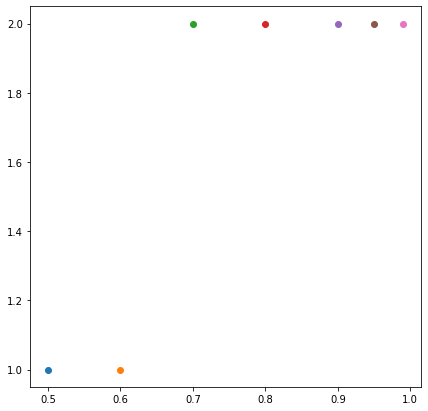

In [ ]:
var = [0.5,0.6,0.7,0.8,0.9,0.95,0.99]
for i in var:
  model = LDA(i)
  model.fit(X_train,Y_train)
  print("Number of High imapct features",model.n_components)
  plt.scatter(i,model.n_components)
plt.show()
  

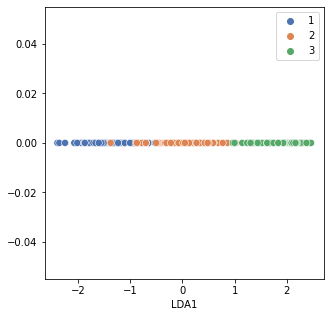

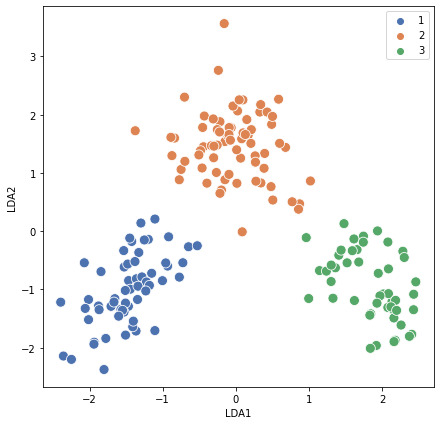

In [ ]:
arr = [0.5,0.8]
labels = [1,2,3]
for i in range(len(arr)):
  model = LDA(arr[i])
  model.fit(X,Y)
  X_lda = (model.transform(X))
  if(i == 0):
    plt.rcParams["figure.figsize"] = (5,5)
    sns.scatterplot(x = X_lda[:,0],y = len(X_lda[:,0])*[0],hue =Y,palette= 'deep',s = 50)
    plt.xlabel('LDA1')
  else:
    plt.rcParams["figure.figsize"] = (7,7)
    sns.scatterplot(x = X_lda[:,0],y = X_lda[:,1],hue =Y,palette ='deep',s = 100)
    plt.xlabel('LDA1')
    plt.ylabel('LDA2')
  # for j in range(len(vec)):
  #   plt.arrow(0,0,vec[0,j],vec[1,j],alpha=0.5, width=0.1, head_width=0.25, head_length=0.35,color='r')
  # plt.legend()
  plt.show()

### Part 3

In [ ]:
X = dataset_2.drop("class",axis = 1)
Y = dataset_2["class"]
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(data = X,columns = dataset_2.columns[1:])
model_LDA = LDA(0.95)
model_LDA.fit(X.to_numpy(),Y.to_numpy())
X_transform = model_LDA.transform(X)
X_red,r,t  = PCA(X,n_components = 2).fit()

X_train_l,X_test_l,Y_train_l,Y_test_l = tts(abs(X_transform),Y,test_size = 0.3 ,shuffle =True)
X_train_p,X_test_p,Y_train_p,Y_test_p = tts(X_red,Y,test_size = 0.3 ,shuffle =True)

In [ ]:
model_BC_l = BC().fit(X_train_l,Y_train_l)
model_BC_p = BC().fit(X_train_p,Y_train_p)
print("Bagging Classifier Score for LDA",model_BC_l.score(X_test_l,Y_test_l))
print("Bagging Classifier Score for PCA",model_BC_p.score(X_test_p,Y_test_p))


model_KNN_l= KNN().fit(X_train_l,Y_train_l)
model_KNN_p = KNN().fit(X_train_p,Y_train_p)
print("KNN Score for LDA",model_KNN_l.score(X_test_l,Y_test_l))
print("KNN Score for PCA",model_KNN_p.score(X_test_p,Y_test_p))

Bagging Classifier Score for LDA 0.8148148148148148
Bagging Classifier Score for PCA 0.9629629629629629
KNN Score for LDA 0.7407407407407407
KNN Score for PCA 0.9814814814814815


### Part 4

In [ ]:
arr = []
lis = [model_BC_l,model_KNN_l,model_BC_p,model_KNN_p]
for i in range(len(lis)):
  temp = []
  if(i%2 == 0):
    temp.append("Bagging Classifier")
    if(i == 0):
      temp.append("LDA")
      temp.append(model_BC_l.score(X_test_l,Y_test_l))
    else:
      temp.append("PCA")
      temp.append(model_BC_p.score(X_test_p,Y_test_p))
  else:
    temp.append("KNN Classifier")
    if(i == 1):
      temp.append("LDA")
      temp.append(model_KNN_l.score(X_test_l,Y_test_l))
    else:
      temp.append("PCA")
      temp.append(model_KNN_p.score(X_test_p,Y_test_p))
  arr.append(temp)
table = pd.DataFrame(arr,columns = ["Classification Technique","Reduction Technique","Accuracy"])
table

,Classification Technique,Reduction Technique,Accuracy
0,Bagging Classifier,LDA,0.814815
1,KNN Classifier,LDA,0.740741
2,Bagging Classifier,PCA,0.962963
3,KNN Classifier,PCA,0.981481


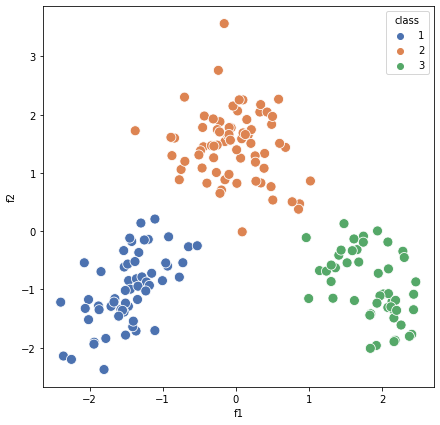

In [ ]:
labels = [1,2,3]
model = LDA(0.95)
model.fit(X.to_numpy(),Y.to_numpy())
X_lda = (model.transform(X.to_numpy()))
plt.rcParams["figure.figsize"] = (7,7)
sns.scatterplot(x = X_lda[:,0],y = X_lda[:,1],hue =Y,palette ='deep',s = 100)
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

### Part 5

In [327]:
def roc_curve(y_true, y_prob):
    fpr, tpr  = [], []
    total_positives = np.sum(y_true == 1)
    for threshold in np.sort(y_prob):
        y_pred = (y_prob >= threshold)
        # print(y_pred)
        tp = np.sum(y_true[y_pred == 1] == 1)
        fp = np.sum(y_true[y_pred == 1] == 0)
        if(tp == 0):
          tpr.append(0)
        else:
          tpr.append(tp / total_positives)
        if(fp == 0):
          fpr.append(0)
        else: 
          fpr.append(fp / np.sum(y_true == 0))

    return np.array(fpr), np.array(tpr)
def auc(fpr, tpr):
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]
    area = 0
    for i in range(1, len(fpr)):
        area += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2
    return area


In [347]:
X = dataset_2.drop("class",axis = 1)
Y = dataset_2["class"]
X = StandardScaler().fit_transform(X)
indices = np.random.permutation(X.shape[0])
X = X[indices]
Y = Y[indices]
k = 5
X_folds = np.array_split(X, k)
Y_folds = np.array_split(Y, k)


[1.0, 0.9722222222222222, 1.0, 0.9142857142857143, 0.9714285714285714]


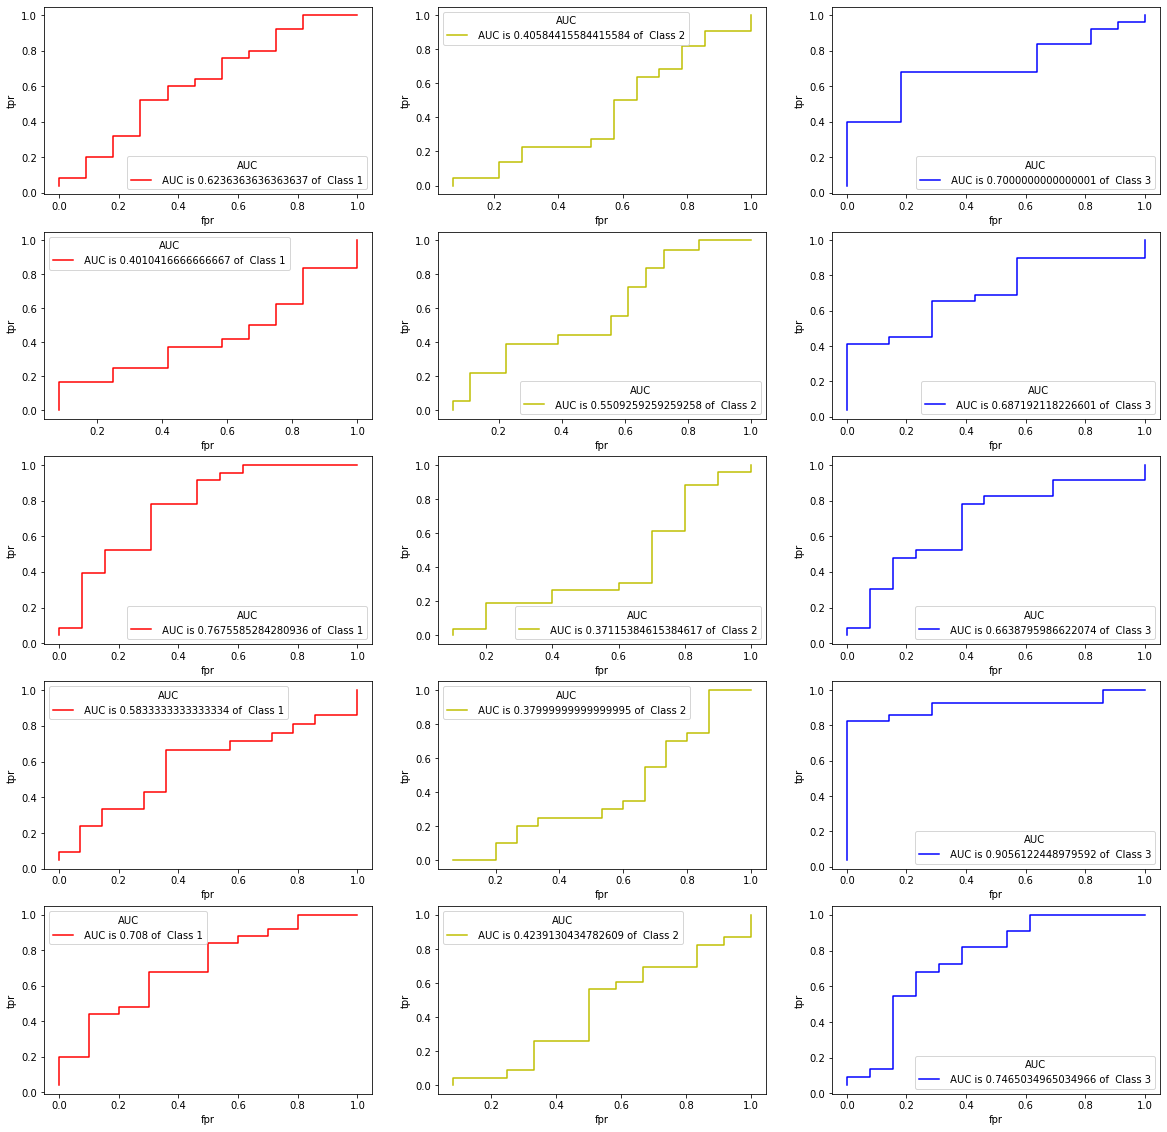

In [353]:
scores = []
fig = plt.figure(figsize =(20, 20))
cnt = 1

for i in range(k):
    score = 0
    color = ['r','y','b']
    for j in np.unique(Y):
      X_train = np.concatenate([X_folds[j] for j in range(k) if j != i])
      Y_train = np.concatenate([Y_folds[j] for j in range(k) if j != i])
      X_test = X_folds[i]
      Y_test = Y_folds[i]
      score = 0
      fpr = 0
      tpr = 0
      model = LDA(0.95)
      Y_train = np.where(Y_train == j,1,0)
      Y_test = np.where(Y_test == j,1,0)
      model.fit(X_train, Y_train)
      Y_pred = np.array(model.predict(X_test))
      y_score = model.predict_proba(X_test)
      y_score = np.array([max(k) for k in y_score])
      tpr,fpr = roc_curve(Y_pred,y_score)
      ax = fig.add_subplot(5,3,cnt)
      area = auc(fpr,tpr)
      plt.plot(fpr,tpr, label =" AUC is " +  str(area) +  " of  Class " + str(j),c = color[j-1])
      plt.xlabel("fpr")
      plt.ylabel("tpr")
      plt.legend(title = "AUC")
      cnt += 1
      score += accuracy_score(Y_test,Y_pred)
    scores.append(score)
print(scores)
plt.show()